In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Function to Generate Training Data with n samples for y = w0 + w1*X

In [2]:
def generate_data(n):
    w1 = 3
    w0 = 4
    X = 10 * np.random.rand(n,)
    y = w0+w1*X+np.random.rand(n,)
    return X,y
X,y=generate_data(100)

Visualize the Data 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

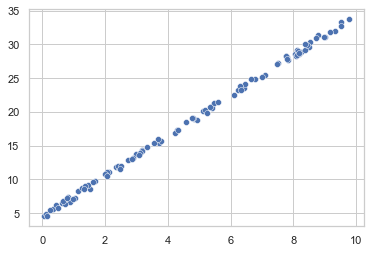

In [8]:
sns.set(style='whitegrid')
sns.scatterplot(X,y)

Function to Add Dummy Feature Column to the Feature Matrix

In [3]:
def add_dummy(x): return np.column_stack((np.ones(x.shape[0]),x))

Create Train-Test Split

In [4]:
def preprocess(X,y):
  X_dummy = add_dummy(X)
  return  train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [6]:
X_train, X_test, y_train, y_test = preprocess(X,y)

Loss Function and Predict Function

In [14]:
def predict(X,w):
  assert X.shape[-1]==w.shape[0]
  return X@w

def loss (X,y,w):
  e = predict(X,w) - y
  # print(e)
  return 0.5*(np.transpose(e)@e)

Assign Random Weights to w and then visualize the Initial Loss

In [18]:
w = np.random.rand(2,)

In [25]:
def visualize_loss_single_feature(X_train, y_train, w):
  sns.set_style("white")
  f = plt.figure(figsize = (8,8))
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

  print(X_train.shape, y_train[:5])
  plt.plot(X_train[:,-1],y_train,"b.")
  pred = predict(X_train,w)
  plt.plot(X_train[:,-1], pred ,"b-", color = 'green')
  plt.title("Loss-vis")
  plt.grid(True)
  plt.xlabel("$x_1$", fontsize = 18)
  plt.ylabel("$y$", fontsize = 18)
  plt.axis([0,10,0,40])

  plt.vlines(X_train[:,-1], pred, y_train, colors = 'r', linestyles = 'solid')

  plt.show()


(80, 2) [ 9.17618666 33.79680604 22.47139495 19.01253866 28.41457142]


C:\Users\green\AppData\Local\Temp/ipykernel_30364/1526263189.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_train[:,-1], pred ,"b-", color = 'green')


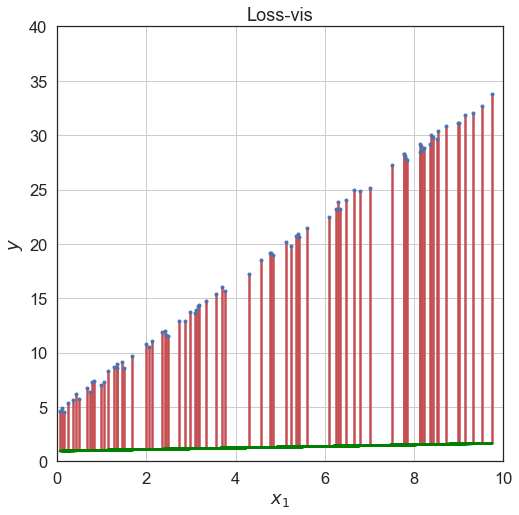

In [26]:
visualize_loss_single_feature(X_train,y_train,w)

Solution to y = w0 + w1*X by calculationg w using Pseudoiverse of X

In [27]:
def normal_eq(X,y):
  return np.linalg.pinv(X)@y # returns weight vec

Solution to y = w0 + w1*X by calculationg w using Gradient Descent

In [31]:
def calc_grad(X,y,w):
    return np.transpose(X)@(predict(X,w)-y)

def weightupdate(w, grad, lr):
    return (w - lr*grad)

In [32]:
def gradient_descent(X:np.ndarray,y:np.ndarray, lr:float, num_epochs:int):
  w_all = []
  err_all = []

  w = np.zeros((X.shape[1]))

  print()

  for i in np.arange(0,num_epochs):
    w_all.append(w)

    err_all.append(loss(X,y,w))

    djdw = calc_grad(X,y,w)

    if i%100 == 0:
      print("Iteration: %d, loss: %4.2f" %(i, err_all[-1]))

    w = weightupdate(w,djdw,lr)

  return w, err_all, w_all

In [42]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr = 0.00001, num_epochs = 19600)


Iteration: 0, loss: 16763.09
Iteration: 100, loss: 298.32
Iteration: 200, loss: 183.60
Iteration: 300, loss: 174.71
Iteration: 400, loss: 166.88
Iteration: 500, loss: 159.41
Iteration: 600, loss: 152.28
Iteration: 700, loss: 145.47
Iteration: 800, loss: 138.98
Iteration: 900, loss: 132.78
Iteration: 1000, loss: 126.87
Iteration: 1100, loss: 121.23
Iteration: 1200, loss: 115.84
Iteration: 1300, loss: 110.70
Iteration: 1400, loss: 105.80
Iteration: 1500, loss: 101.12
Iteration: 1600, loss: 96.65
Iteration: 1700, loss: 92.39
Iteration: 1800, loss: 88.32
Iteration: 1900, loss: 84.44
Iteration: 2000, loss: 80.74
Iteration: 2100, loss: 77.20
Iteration: 2200, loss: 73.83
Iteration: 2300, loss: 70.61
Iteration: 2400, loss: 67.54
Iteration: 2500, loss: 64.61
Iteration: 2600, loss: 61.81
Iteration: 2700, loss: 59.14
Iteration: 2800, loss: 56.59
Iteration: 2900, loss: 54.16
Iteration: 3000, loss: 51.84
Iteration: 3100, loss: 49.63
Iteration: 3200, loss: 47.52
Iteration: 3300, loss: 45.50
Iterati